# HyperParameter Tuning

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [42]:
from yellowbrick.datasets import load_credit

X = load_credit()[0]
y = load_credit()[1]

In [43]:
X.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [48]:
from sklearn.model_selection import cross_val_score, KFold

In [49]:
cross_val_score(model, X_train , y_train, scoring='roc_auc')

array([0.72196733, 0.72887576, 0.7162546 , 0.73322686, 0.70694135])

In [50]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.7293889333151294

# Grid Search:

![grid_vs_random.png](grid_vs_random.png)

Grid search just keeps testing all combinations in your `search space` until you obtain the best possible result.

In [12]:
for parameter in [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]:
    
    #print(parameter) 
    model = LogisticRegression(C=parameter)
    
    cross_val_score(model, 
                    X_train, 
                    y_train, 
                    cv=KFold(5), 
                    scoring='roc_auc').mean()
    
    

You don't need to loop though, you can use a package for it.

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
model

LogisticRegression(C=6)

In [15]:
search_space = [{
    'C': [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]
}]

grid_search = GridSearchCV(model, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(C=6), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]}],
             scoring='roc_auc', verbose=True)

In [17]:
grid_search.best_estimator_

LogisticRegression(C=6)

In [18]:
grid_search.best_params_

{'C': 6}

In [19]:
grid_search.best_score_

0.7239894768149168

## We could search more features in our search space

In [20]:
LogisticRegression()

LogisticRegression()

In [21]:
model = LogisticRegression(solver='saga')

In [22]:
search_space = [{
    'penalty':['l1','l2'],
    'C': [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]
}]

grid_search = GridSearchCV(model, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='precision', 
                           n_jobs=-1, 
                           verbose=True,
                           refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\raian\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6],
                          'penalty': ['l1', 'l2']}],
             scoring='precision', verbose=True)

In [23]:
grid_search.best_params_

{'C': 4, 'penalty': 'l2'}

In [24]:
grid_search.best_score_

0.7170991870072089

In [25]:
grid_search.predict_proba(X_test)[:,1]
#best_estimator_.predict_proba(X_test)[:, 1]

array([0.06867296, 0.04457536, 0.18359445, ..., 0.13424151, 0.03621693,
       0.24621067])

## Conclusion:

Grid search can be really time consuming.

In [121]:
#from multiprocessing import Pool
#pool = Pool()
#pool.map_async()

- Hyperopt: https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0

# Randomized Search

Instead of taking **all** combinations, what iff we give the algorithm some direction?

In [52]:
from scipy.stats import uniform, gamma, beta, randint
from sklearn.model_selection import RandomizedSearchCV

C:\Users\raian\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

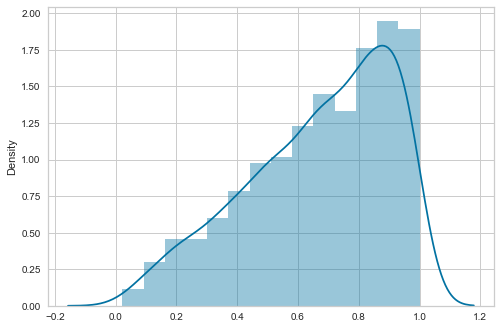

In [53]:
sns.distplot(beta(2, 1, loc=0, scale=1).rvs(size=1000))

C:\Users\raian\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

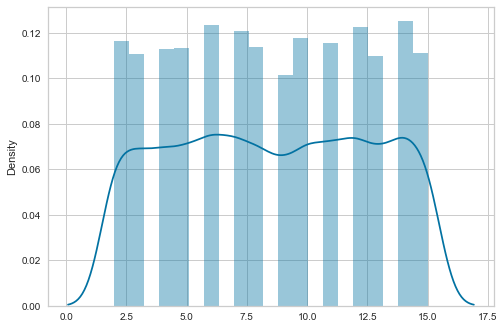

In [54]:
# uniform distrtibution
sns.distplot(randint(2,16).rvs(size=10000))

C:\Users\raian\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

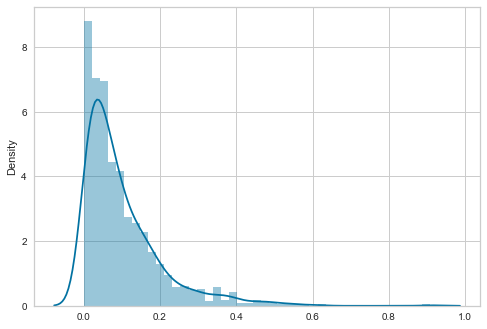

In [55]:
# gamma distribution
sns.distplot(gamma(1, loc=0, scale=0.1).rvs(size=1000))

C:\Users\raian\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

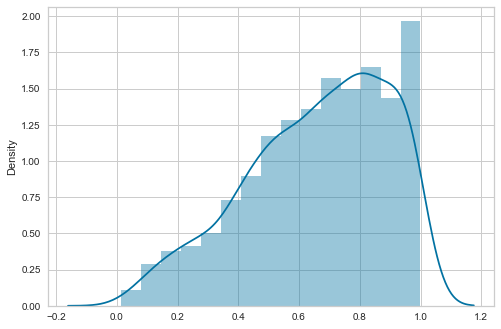

In [56]:
# beta distribution
sns.distplot(beta(2, 1, loc=0, scale=1).rvs(size=1000))

In [57]:
from lightgbm import LGBMClassifier
search_space ={'boosting_type': ['gbdt','dart','goss','rf'],
              'num_leaves': randint(2,8),
              'max_depth': randint(1,3),
              'learning_rate': gamma(1, loc=0, scale=0.1),
              'n_estimators': randint(10,50),
              'colsample_bytree': beta(2, 1, loc=0, scale=1),
              'reg_alpha': gamma(.5, loc=0, scale=0.5),
              'reg_lambda': gamma(.5, loc=0, scale=0.5)}

n_iter_search = 1000

random_search = RandomizedSearchCV(LGBMClassifier(), 
                           param_distributions=search_space,
                           n_iter=n_iter_search, 
                           cv=KFold(3), 
                           scoring='precision', 
                           n_jobs=-1, 
                           verbose=True,
                           refit=True)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\raian\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.72386692 0.70852105        nan 0.         0.68351517 0.
 0.         0.70541987        nan 0.70355528 0.7207079  0.73260293
 0.72018396 0.70707608 0.68157214        nan 0.70316096 0.66839188
 0.         0.71502498 0.         0.70497475 0.6661972  0.67442168
 0.66134051 0.7073339  0.6938652  0.         0.66854934 0.6944055
 0.68557059        nan 0.68009843 0.71623956 0.69249626 0.70239664
 0.68723209 0.71802253        nan 0.         0.67778611        nan
 0.68566565 0.         0.         0.         0.                nan
        nan 0.70806144 0.         0.67992512 0.68178359 0.72510094
        nan 0.         0.67919248 0.63581616        nan 0.67304995
 0.68460796 0.68659369 0.71356955 0.         0.         0.
        nan 0.         0.70929781        nan 0.72646704 0.
 0.         0.69167302 0.74117657        nan 0.72140811 0.70816869
 0.7001085

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(), n_iter=1000, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209A6430220>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209A6414A30>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209A6426B50>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209A6426D90>,
                                        'reg_lambda': <scip

In [58]:
random_search.best_estimator_

LGBMClassifier(boosting_type='dart', colsample_bytree=0.9262974564010118,
               learning_rate=0.07674814357166546, max_depth=2, n_estimators=13,
               num_leaves=6, reg_alpha=0.04483792776028987,
               reg_lambda=0.6029597113859376)

In [34]:
random_search.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.15007818119581903,
 'learning_rate': 0.04931351695666615,
 'max_depth': 2,
 'n_estimators': 36,
 'num_leaves': 5,
 'reg_alpha': 0.12484328115152793,
 'reg_lambda': 0.10269008968087633}

In [35]:
random_search.best_score_

0.821504884004884

In [36]:
random_search.best_estimator_.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', colsample_bytree=0.15007818119581903,
               learning_rate=0.04931351695666615, max_depth=2, n_estimators=36,
               num_leaves=5, reg_alpha=0.12484328115152793,
               reg_lambda=0.10269008968087633)

In [37]:
roc_auc_score(y_test, random_search.best_estimator_.predict_proba(X_test)[:, 1])

0.7566646326569091

In [38]:
import joblib

In [39]:
my_dict = {'Atum': 120, 
           'Kali': 130,
           'Pingo':150}
joblib.dump(my_dict, 'dict.pkl')

['dict.pkl']

In [40]:
joblib.dump(random_search.best_estimator_, 'modelo.pkl')

['modelo.pkl']

# Using pipelines to search

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

In [65]:
X_train.shape

(460, 11)

In [ ]:
pipe = Pipeline([('preprocessing', PCA()),
                 ('modelling', model)])


In [74]:
len(np.arange(0, 4, 0.2)) * 14 * 2 * 3

1680

In [78]:
# Create space of candidate values
search_space = [{'preprocessing__n_components': np.arange(1, 10),
                 'modelling__penalty': ['l1', 'l2'],
                 'modelling__C': np.arange(0, 4, 0.2)}]

In [79]:
grid_search = GridSearchCV(pipe, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  

KeyboardInterrupt: 

In [52]:
grid_search.best_params_

{'modelling__C': 3.8000000000000003,
 'modelling__penalty': 'l2',
 'preprocessing__n_components': 9}

In [89]:
grid_search.best_estimator_.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Using a more complicated pipeline.

In [57]:
df = pd.read_csv('data/loan_dataset_train.csv')

X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df.Loan_Status.apply(lambda x : 1 if x == 'Y' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [59]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
ordinal_encoder = OneHotEncoder(drop='first', handle_unknown='error')

numerical_imputer = SimpleImputer()
scaler = StandardScaler()

categorical_pipeline = Pipeline(steps=[('missing', categorical_imputer),
                                       ('encode', ordinal_encoder)])

numerical_pipeline = Pipeline(steps=[('missing', numerical_imputer),
                                     ('standardize', scaler)])

In [60]:
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer


cat_columns = list(X_train.select_dtypes('object').columns)
num_columns = list(X_train.select_dtypes(exclude='object').columns)
dataprep = ColumnTransformer(transformers=[('numerical_transform', numerical_pipeline, num_columns),
                                           ('categ_transform', categorical_pipeline, cat_columns)])



pipeline = Pipeline(steps=[('dataprep', dataprep),
                           ('model', LGBMClassifier())])

In [110]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {'dataprep__numerical_transform__missing__strategy': ['mean','median'],
              'model__boosting_type': ['gbdt','dart','goss','rf'],
              'model__num_leaves': [4, 8, 16],
              'model__max_depth': [2,3,4],
              'model__learning_rate': [0.01, 0.1,],
              'model__n_estimators': [30, 50, 100],
              'model__colsample_bytree': [0.8, 0.9],
              'model__reg_alpha': [0, 0.1, 0.5],
              'model__reg_lambda': [0, 0.1, 0.5],
             }

In [113]:
hash('12')

-2268282524595630939

In [114]:
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 3300 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 6100 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 9700 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 14100 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 19300 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 23328 out of 23328 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dataprep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical_transform',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('missing',
                                                                                          SimpleImputer(add_indicator=False,
                                                                            

In [116]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('dataprep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical_transform',
                                                  Pipeline(memory=None,
                                                           steps=[('missing',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                   

In [120]:
grid_search.best_params_

{'dataprep__numerical_transform__missing__strategy': 'mean',
 'model__boosting_type': 'goss',
 'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 50,
 'model__num_leaves': 8,
 'model__reg_alpha': 0,
 'model__reg_lambda': 0.5}

## Random Search With pipeline

In [138]:
# specify parameters and distributions to sample from

param_dist = {'model__boosting_type': ['gbdt','dart','goss','rf'],
              'model__num_leaves': randint(2,8),
              'model__max_depth': randint(1,3),
              'model__learning_rate': gamma(1, loc=0, scale=0.1),
              'model__n_estimators': randint(10,50),
              'model__colsample_bytree': beta(2, 1, loc=0, scale=1),
              'model__reg_alpha': gamma(.5, loc=0, scale=0.5),
              'model__reg_lambda': gamma(.5, loc=0, scale=0.5)
             }

n_iter_search = 10000
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, 
                                   verbose=True, 
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring='roc_auc',
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 3132 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 5932 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 9532 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 13932 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 19132 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 25132 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 31932 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 39532 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 47932 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 49989 out of 50000 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:  3.2min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('dataprep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numerical_transform',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('missing',
                                                                                                SimpleImputer(add_indicator=False,
     

In [139]:
random_search.best_estimator_

Pipeline(memory=None,
         steps=[('dataprep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical_transform',
                                                  Pipeline(memory=None,
                                                           steps=[('missing',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                   

In [140]:
random_search.best_params_

{'model__boosting_type': 'goss',
 'model__colsample_bytree': 0.38886276123677543,
 'model__learning_rate': 0.03177761772571983,
 'model__max_depth': 1,
 'model__n_estimators': 43,
 'model__num_leaves': 4,
 'model__reg_alpha': 0.31343811372687985,
 'model__reg_lambda': 0.03416805165101736}

In [141]:
random_search.best_score_

0.7858845661383393

In [143]:
from sklearn.model_selection import learning_curve

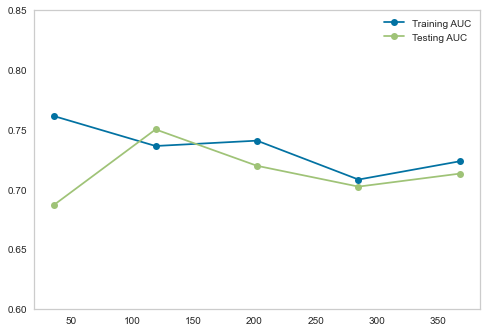

In [144]:
curves = learning_curve(random_search.best_estimator_, X_train, y_train, cv=KFold(n_splits=5, shuffle=True))

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Testing AUC')
plt.grid()
plt.ylim([0.6, .85])
plt.legend()

In [148]:
random_search.best_estimator_.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('dataprep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical_transform',
                                                  Pipeline(memory=None,
                                                           steps=[('missing',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                   

In [149]:
roc_auc_score(y_test, random_search.best_estimator_.predict_proba(X_test)[:, 1])

0.723368710691824

## Com a logistica

In [160]:
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer

categorical_imputer = SimpleImputer(strategy='most_frequent')
ordinal_encoder = OneHotEncoder(drop='first', handle_unknown='error')

numerical_imputer = SimpleImputer()
scaler = StandardScaler()

categorical_pipeline = Pipeline(steps=[('missing', categorical_imputer),
                                       ('encode', ordinal_encoder)])

numerical_pipeline = Pipeline(steps=[('missing', numerical_imputer),
                                     ('standardize', scaler)])
cat_columns = list(X_train.select_dtypes('object').columns)
num_columns = list(X_train.select_dtypes(exclude='object').columns)
dataprep = ColumnTransformer(transformers=[('numerical_transform', numerical_pipeline, num_columns),
                                           ('categ_transform', categorical_pipeline, cat_columns)])



pipeline = Pipeline(steps=[('dataprep', dataprep),
                           ('model', LogisticRegression(solver='saga'))])

In [171]:
# specify parameters and distributions to sample from

param_dist = {
    'dataprep__numerical_transform__missing__strategy':['mean','median'],
    'model__C': gamma(1, loc=0, scale=0.1)
             }

n_iter_search = 1000
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, verbose=True, 
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring='roc_auc',
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 3300 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   21.1s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('dataprep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numerical_transform',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('missing',
                                                                                                SimpleImputer(add_indicator=False,
     

In [172]:
random_search.best_params_

{'dataprep__numerical_transform__missing__strategy': 'mean',
 'model__C': 0.013206896835415592}

In [173]:
random_search.best_estimator_.named_steps.model

LogisticRegression(C=0.013206896835415592, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

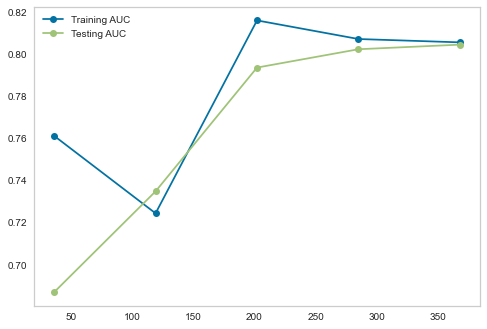

In [174]:
curves = learning_curve(random_search.best_estimator_, 
                        X_train, 
                        y_train, 
                        cv=KFold(n_splits=5, shuffle=True))

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Testing AUC')
plt.grid()
plt.legend()

In [176]:
roc_auc_score(y_test, random_search.best_estimator_.predict_proba(X_test)[:, 1])

0.7669025157232704

## RF

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer

categorical_imputer = SimpleImputer(strategy='most_frequent')
ordinal_encoder = OneHotEncoder(drop='first', handle_unknown='error')

numerical_imputer = SimpleImputer()
scaler = StandardScaler()

categorical_pipeline = Pipeline(steps=[('missing', categorical_imputer),
                                       ('encode', ordinal_encoder)])

numerical_pipeline = Pipeline(steps=[('missing', numerical_imputer),
                                     ('standardize', scaler)])
cat_columns = list(X_train.select_dtypes('object').columns)
num_columns = list(X_train.select_dtypes(exclude='object').columns)
dataprep = ColumnTransformer(transformers=[('numerical_transform', numerical_pipeline, num_columns),
                                           ('categ_transform', categorical_pipeline, cat_columns)])



pipeline = Pipeline(steps=[('dataprep', dataprep),
                           ('model', RandomForestClassifier())])


# specify parameters and distributions to sample from

param_dist = {'model__criterion': ['gini','entropy'],
              'model__min_samples_split': randint(2,100),
              'model__max_depth': randint(1,3),
              'model__n_estimators': randint(10,50),
              'model__max_features': beta(2, 1, loc=0, scale=1),
              'model__ccp_alpha': gamma(.5, loc=0, scale=0.5)
             }

n_iter_search = 1000
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, verbose=True, 
                                   cv=KFold(n_splits=15, shuffle=True),
                                   scoring='roc_auc',
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 3092 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 4892 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 7092 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9692 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12692 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  2.6min finished


RandomizedSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('dataprep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numerical_transform',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('missing',
                                                                                                SimpleImputer(add_indicator=False,
    

In [208]:
curves

(array([ 36, 119, 202, 285, 368]),
 array([[0.77777778, 0.77777778, 0.75      , 0.75      , 0.80555556],
        [0.78991597, 0.79831933, 0.78991597, 0.81512605, 0.78991597],
        [0.81683168, 0.8019802 , 0.81188119, 0.83663366, 0.81683168],
        [0.81403509, 0.79649123, 0.8       , 0.81754386, 0.81052632],
        [0.81521739, 0.79347826, 0.79891304, 0.8125    , 0.80706522]]),
 array([[0.59782609, 0.75      , 0.68478261, 0.68478261, 0.7173913 ],
        [0.76086957, 0.84782609, 0.82608696, 0.79347826, 0.79347826],
        [0.76086957, 0.84782609, 0.82608696, 0.79347826, 0.79347826],
        [0.76086957, 0.84782609, 0.82608696, 0.79347826, 0.79347826],
        [0.76086957, 0.84782609, 0.82608696, 0.79347826, 0.79347826]]))

In [214]:
curves

(array([ 36, 119, 202, 285, 368]),
 array([[0.69444444, 0.77777778, 0.77777778, 0.72222222, 0.77777778],
        [0.80672269, 0.78991597, 0.77310924, 0.83193277, 0.78991597],
        [0.82178218, 0.81683168, 0.81188119, 0.84158416, 0.7970297 ],
        [0.81052632, 0.8       , 0.81403509, 0.82105263, 0.79649123],
        [0.81793478, 0.79347826, 0.80163043, 0.81521739, 0.79891304]]),
 array([[0.66304348, 0.69565217, 0.66304348, 0.68478261, 0.72826087],
        [0.77173913, 0.84782609, 0.81521739, 0.76086957, 0.82608696],
        [0.77173913, 0.84782609, 0.81521739, 0.76086957, 0.82608696],
        [0.77173913, 0.84782609, 0.81521739, 0.76086957, 0.82608696],
        [0.77173913, 0.84782609, 0.81521739, 0.76086957, 0.82608696]]))

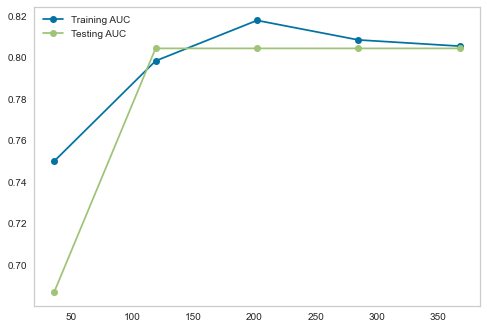

In [212]:
curves = learning_curve(random_search.best_estimator_, 
                        X_train, 
                        y_train, 
                        cv=KFold(n_splits=5, shuffle=True, random_state=42))

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Testing AUC')
plt.grid()
plt.legend()

c:\programas\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


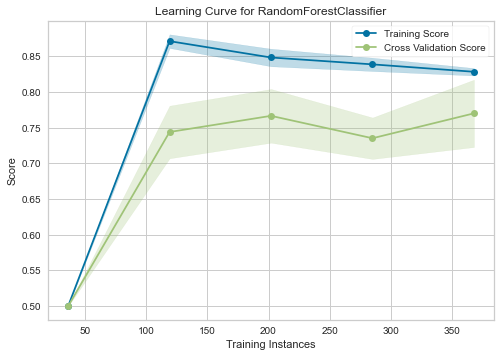

In [218]:
from yellowbrick.model_selection import LearningCurve

sizes = [0.1  , 0.325, 0.55 , 0.775, 1.   ]

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    random_search.best_estimator_, 
    cv=KFold(5, shuffle=True, random_state=42), 
    scoring='roc_auc', 
    train_sizes=sizes, 
    n_jobs=6
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [203]:
roc_auc_score(y_test, random_search.best_estimator_.predict_proba(X_test)[:, 1])

0.7521619496855345